In [15]:
import os
import numpy as np
import pandas as pd
import torchvision
import mlflow
mlflow.set_tracking_uri("file:///mnt/md0/user/scheuererra68323/covid-ecg/mlruns")
import mlflow.sklearn
pd.options.display.float_format = '{:,.4f}'.format
import sklearn.metrics
import matplotlib.pyplot as plt
from cam.scorecam import *
from utils import *
from pathlib import Path

plt.style.use('seaborn-white')
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['figure.titleweight'] = 'bold'


from covidecg.train import RAW_TRANSFORMS, LINFFT_TRANSFORMS, IMAGE_TRANSFORMS
import covidecg.data.utils as data_utils
from skorch.helper import SliceDataset

model = mlflow.sklearn.load_model(f'runs:/bf004c68f47a47e9abdc5c4b87c5e201/best_model')

test_data = torchvision.datasets.ImageFolder(
        '/nfs/user/scheuererra68323/covid-ecg/data/processed/khan_tasks_img/khan_covid_vs_normal250/test', 
        transform=IMAGE_TRANSFORMS)

In [16]:
y_pred = model.predict(SliceDataset(test_data))

Sample 80 from /nfs/user/scheuererra68323/covid-ecg/data/processed/khan_tasks_img/khan_covid_vs_normal250/test - Binder1_Page_171.png
predicted: 1 actual: 1



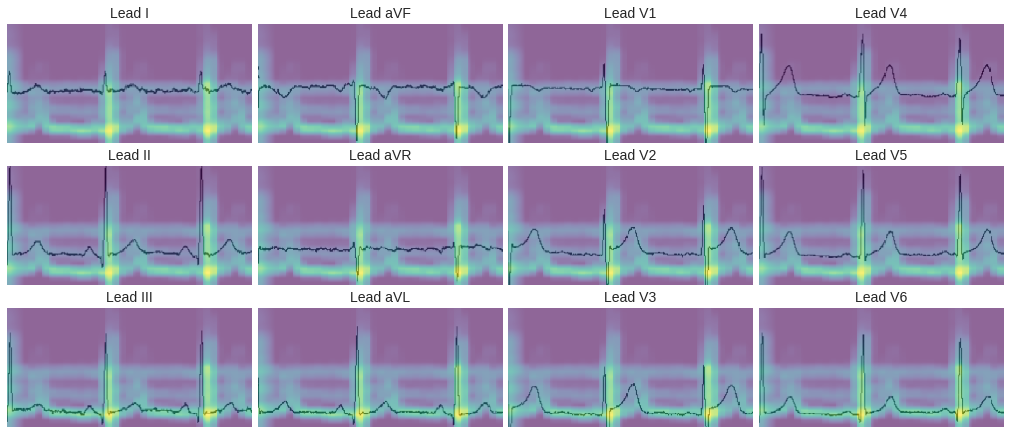

In [55]:
model_scorecam = ScoreCAM(dict(type=model.module_.__class__.__name__, arch=model.module_, layer_name='conv3'))

idx = 80  # 52 60
    
print(f"Sample {idx} from {test_data.root} - {Path(test_data.samples[idx][0]).name}")

input_image = SliceDataset(test_data)[idx].to('cuda:0')
print("predicted:", y_pred[idx], "actual:", test_data.targets[idx])

scorecam_map = model_scorecam(input_image[None, :], class_idx=y_pred[idx])
print("")
with torch.no_grad():
    # visualize Score-CAM for Lead II
    ecg_visualize(input_image, scorecam_map.type(torch.FloatTensor))

In [50]:
print("covid", scorecam_map.mean(), scorecam_map.std())

covid tensor(0.1311, device='cuda:0') tensor(0.2165, device='cuda:0')


In [52]:
print("ctrl", scorecam_map.mean(), scorecam_map.std())

ctrl tensor(0.1112, device='cuda:0') tensor(0.2167, device='cuda:0')
